In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

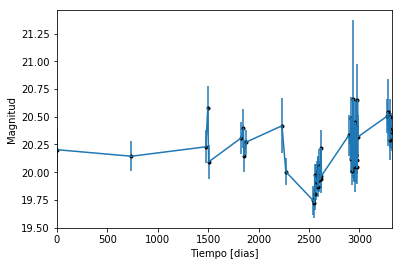

In [2]:
data = np.genfromtxt('LC_19055_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

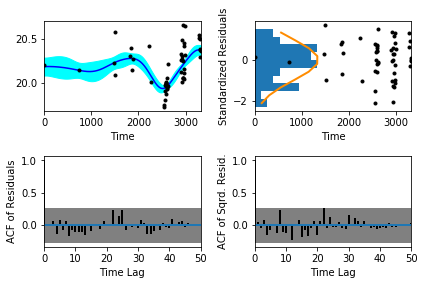

In [5]:
sample.assess_fit()

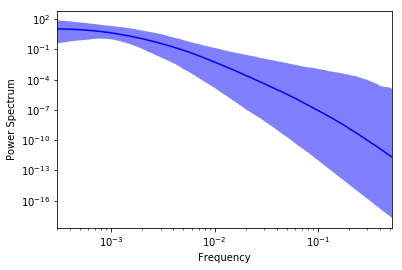

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,3.14312,'Medida del nivel de ruido')

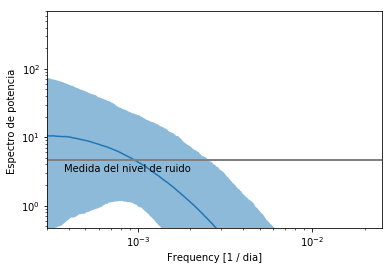

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

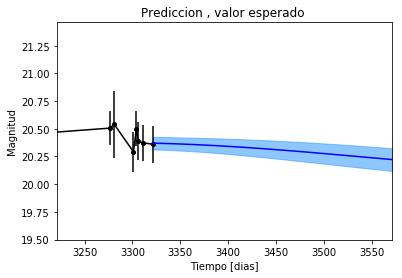

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

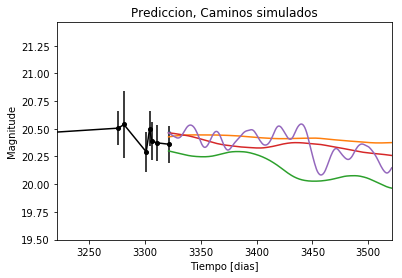

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


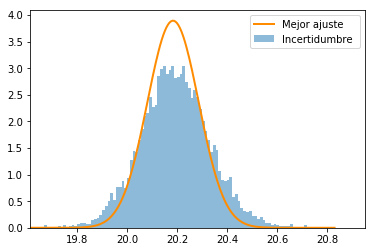

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

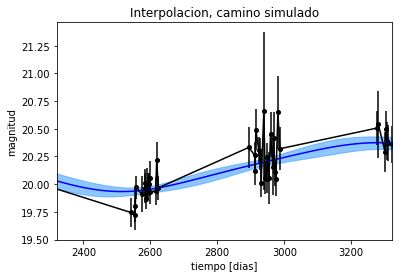

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

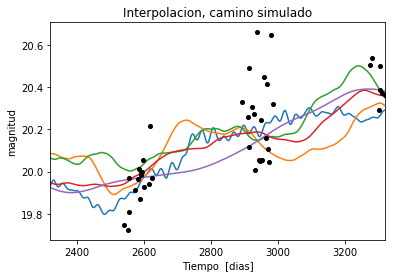

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 429.567368311
Median: 0.0121019825126
Standard deviation: 0.214133141399
68% credibility interval: [ 0.000768    0.22340842]
95% credibility interval: [  3.39514114e-04   8.37790394e-01]
99% credibility interval: [  3.08797736e-04   1.03124919e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 653.443537558
Median: 0.00135739477512
Standard deviation: 0.0675687386415
68% credibility interval: [ 0.00045393  0.01789956]
95% credibility interval: [ 0.00032208  0.18670274]
99% credibility interval: [  3.05464264e-04   5.08147474e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 539.144207136
Median: 0.0205510945094
Standard 

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 478.819585624
Median: 0.000875042155373
Standard deviation: 0.212995908905
68% credibility interval: [ 0.          0.18658057]
95% credibility interval: [ 0.          0.83750094]
99% credibility interval: [ 0.          0.98058968]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 478.819585624
Median: 0.000875042155373
Standard deviation: 0.212995908905
68% credibility interval: [ 0.          0.18658057]
95% credibility interval: [ 0.          0.83750094]
99% credibility interval: [ 0.          0.98058968]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 753.282954462
Median: 0.0
Standard deviation: 0.000544382979241
68

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1102.74863369
Median: 44.7808883431
Standard deviation: 1.59655560296
68% credibility interval: [ 42.92498122  45.80296423]
95% credibility interval: [ 40.52067684  46.70480357]
99% credibility interval: [ 38.52229244  47.07996007]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 223.958181248
Median: 0.688636796671
Standard deviation: 2.06844911971
68% credibility interval: [ 0.06281764  3.89006095]
95% credibility interval: [ 0.01486657  6.71348736]
99% credibility interval: [ 0.01055392  9.3068642 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 669.21913134
Median: 0.205769952583
Standard deviation: 7.48980772712
68% credibility interval: [ 0.0058605   4.51587192]
95% credibility interval: [  3.69775349e-04

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 297.124446469
Median: 2.39811725567e-22
Standard deviation: 7.45742163821e+148
68% credibility interval: [  1.17622773e-95   3.78335914e+31]
95% credibility interval: [  2.00191030e-131   1.87648345e+139]
99% credibility interval: [  2.73241721e-137   2.95120306e+149]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3004.73200954
Median: 20.1876641697
Standard deviation: 0.0880756410338
68% credibility interval: [ 20.11695124  20.26543631]
95% credibility interval: [ 20.02347007  20.37615998]
99% credibility interval: [ 19.91942334  20.49511927]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 478.819585624
Median: 0.000875042155373
Standard deviation: 0.212995908905
68% credibility interval: [ 0.          0.18658057]
95% credibility interval: [ 0.          0.83750094]
99% credibility interval: [ 0.          0.98058968]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 478.819585624
Median: 0.000875042155373
Standard deviation: 0.212995908905
68% credibility interval: [ 0.          0.18658057]
95% credibility interval: [ 0.          0.83750094]
99% credibility interval: [ 0.          0.98058968]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 753.282954462
Median: 0.0
Standard deviation: 0.000544382979241
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1102.74863369
Median: 44.7808883431
Standard deviation: 1.59655560296
68% credibility interval: [ 42.92498122  45.80296423]
95% credibility interval: [ 40.52067684  46.70480357]
99% credibility interval: [ 38.52229244  47.07996007]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2236.91785819
Median: 0.0284894154749
Standard deviation: 0.0425908833622
68% credibility interval: [ 0.01526706  0.05708773]
95% credibility interval: [ 0.00906057  0.1293084 ]
99% credibility interval: [ 0.00649873  0.24059464]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1986.09425903
Median: 0.873351038495
Standard deviation: 0.13396724648
68% credibility interval: [ 0.75949018  1.01813561]
95% credibility interval: [ 0.66081323  1.18383595]
99% credibility interval: [ 0.61280058  1.31192951]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1149.28559139
Median: 2.11798893419e-05
Standard deviation: 0.113211003863
68% credibility interval: [  5.59992336e-36   1.99338468e-03]
95% credibility interval: [  6.87042375e-145   8.89328286e-002]
99% credibility interval: [  2.04425376e-154   5.88607445e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 429.567368311
Median: (-0.076038998711-0.614014854156j)
Standard deviation: 1.89769109625
68% credibility interval: [-1.40371649+0.j         -0.00482547-0.29233584j]
95% credibility interval: [ -5.26399229e+00+0.j          -2.13323009e-03-0.55557538j]
99% credibility interval: [ -6.47952976e+00+0.j         -1.94023340e-03-0.0049883j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 653.443537558
Median: (-0.0085287629071+0.0104546998385j)
Standard deviation: 1.4040183763
68% credibility interval: [-0.11246623+5.43881497j -0.00285215+0.09014546j]
95% credibility interval: [-1.17308790 +2.91511804e+00j -0.00202371 +2.71719698e-04j]
99% credibility interval: [ -3.19278475e+00+3.49774822j  -1.91928857e-03+0.j        ]
Poste